<a href="https://colab.research.google.com/github/mingun0112/ML/blob/main/1-3.%20Preprocessing_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
                #Bream 길이
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]# Bream 무게

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0] #smelt 길이
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9] #smelt 무게

fish_length=bream_length+smelt_length
fish_weight=bream_weight+smelt_weight #길이, 무게 병합

# 1. PreProcessing

In [11]:
fish_data=np.column_stack((fish_length,fish_weight)) #열을 기준으로 리스트로 병합
print(fish_data[:5])
type(fish_data)

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


numpy.ndarray

In [14]:
fish_target=np.concatenate((np.ones(35),np.zeros(14))) #concatenate은 행을 기준으로 리스트 병합
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [20]:
from sklearn.model_selection import train_test_split #default로 25% 정도를 test set으로 떼온다.
train_input, test_input, train_target, test_target=train_test_split(fish_data, fish_target, random_state=42)#사이킷런의 모듈을 이용해 간편하게 test, train set을 분류
#random_state, seed의 값을 42로 주는 이유는 나도 모른다.. 프로그래머들이 난수를 생성할 때 암묵적인.. 모르겠다.

In [18]:
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(36, 2) (13, 2)
(36,) (13,)


In [21]:
print(test_target) # 0이 조금 많다 sampling bias를 방지해야한다.

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [22]:
train_input, test_input, train_target, test_target=train_test_split(fish_data, fish_target,stratify=fish_target, random_state=42) 

In [23]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


# 2. Training

In [24]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn=kn.fit(train_input,train_target)
kn.score(test_input, test_target)

1.0

In [30]:
kn.predict([[25,150]]) # length가 25 weight가 150인 임의의 물고기로 테스트 했을 때 1이 아닌 0으로 예측함

array([0.])

# 3. Find Neighbors

In [33]:
distance, index = kn.kneighbors([[25,150]]) # [25, 150]인 물고기의 neighbor의 거리와 인덱스를 반환 default가 5이므로 5개씩 반환
print(distance, index)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]] [[21 33 19 30  1]]


In [35]:
import matplotlib.pyplot as plt

가까운 이웃이 0이 많기 때문에 [25,150]역시 0으로 추측함.

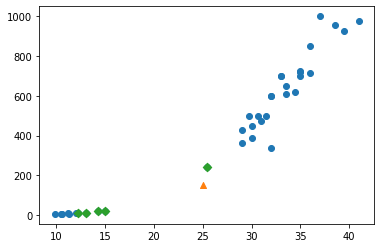

In [37]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25, 150, marker="^")
plt.scatter(train_input[index,0],train_input[index,1],marker='D')
plt.show()

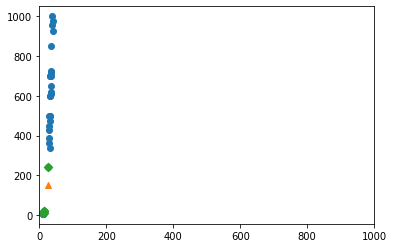

In [38]:
plt.scatter(train_input[:,0],train_input[:,1])
plt.scatter(25, 150, marker="^")
plt.xlim(0,1000) #x 값의 범위 조절을 통해 x,y의 비율을 통일
plt.scatter(train_input[index,0],train_input[index,1],marker='D')
plt.show()

# 4. Data preprocessing
위와 같은 현상을 방지하기 위해 데이터 전처리 과정이 필요함.

아래는 standard score(표준 점수)를 기반으로한 전처리 방법

In [42]:
mean=np.mean(train_input, axis =0) #평균
std=np.std(train_input, axis =0) #표준편차
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [43]:
train_scale=(train_input - mean)/std

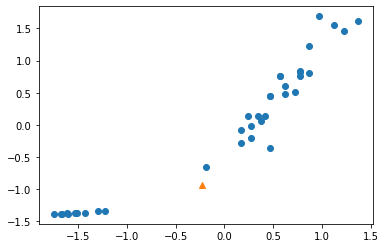

In [46]:
plt.scatter(train_scale[:,0],train_scale[:,1])
new=([25,150]-mean)/std
plt.scatter(new[0],new[1], marker="^")
plt.show()

In [54]:
kn=kn.fit(train_scale, train_target)
test_scale=(test_input-mean)/std
kn.score(test_scale, test_target)

1.0

전처리는 서로 다른 scale을 가진 feature들의 scale을 맞춰주는 작업.

In [57]:
kn.predict([new]) #전처리 후 올바르게 동작함을 확인할 수 있음.

array([1.])